## Ciencia de Datos en Python
### Edi Antonio Ordoñez Hernández
#### Carné 9912628
## --------------------------------------------------------------------------------------

## Proyecto Final

#### Descripción: El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal univariable sencillos.

#### 1. Crear un entorno de anaconda con los paquetes que considere necesarios.

##### 1.1 Importando los paquetes permitidos a utilizar

In [201]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

##### 1.2 Cargando datos

In [202]:
TrainingData = np.load('proyecto_training_data.npy')

##### 1.3 Presentando Información

In [203]:
DataGlobal = pd.DataFrame(TrainingData)
DataGlobal

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


#### 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %).

##### 2.1 Asignando data de entrenamiento (80%)

In [163]:
DataSet_Train = DataGlobal.iloc[:int(DataGlobal[0].count()*.8)]
DataSet_Train.set_axis(['SalePrice', 'OverallQual', 'First Floor square feet','Total rooms above grade', 
                            'Original construction date', 'Linear feet of street connected to property'], 
                    axis='columns', inplace=True)
DataSet_Train

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


##### 2.1 Asignando data de Validación y Pruebas (20%)

In [204]:
DataSet_Test = DataGlobal.iloc[:int(DataGlobal[0].count()*.2)]
DataSet_Test.set_axis(['SalePrice', 'OverallQual', 'First Floor square feet','Total rooms above grade', 
                            'Original construction date', 'Linear feet of street connected to property'], 
                    axis='columns', inplace=True)
DataSet_Test

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
287,88000.0,4.0,858.0,5.0,1971.0,NaN
288,122000.0,5.0,900.0,5.0,1967.0,NaN
289,153575.0,6.0,698.0,7.0,1915.0,60.0
290,233230.0,8.0,1079.0,8.0,2006.0,120.0


#### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular la media, el máximo, el mínimo, el rango y la desviación estándar. (numpy o pandas):

##### 3.1 Media

In [205]:
Media = DataSet_Train.mean(axis=0)
Media

SalePrice                                      180590.277397
OverallQual                                         6.101027
First Floor square feet                          1156.323630
Total rooms above grade                             6.485445
Original construction date                       1971.451199
Linear feet of street connected to property        69.946985
dtype: float64

##### 3.2 valor máximo

In [206]:
Maximo = DataSet_Train.max(axis=0)
Maximo

SalePrice                                      755000.0
OverallQual                                        10.0
First Floor square feet                          3228.0
Total rooms above grade                            14.0
Original construction date                       2010.0
Linear feet of street connected to property       313.0
dtype: float64

##### 3.3 valor mínimo

In [207]:
Minimo = DataSet_Train.min(axis=0)
Minimo

SalePrice                                      34900.0
OverallQual                                        1.0
First Floor square feet                          334.0
Total rooms above grade                            2.0
Original construction date                      1875.0
Linear feet of street connected to property       21.0
dtype: float64

##### 3.4 Rango Peak to Peak

In [208]:
Rangopp = DataSet_Train.ndim
Rangopp

2

##### 3.5 Desviación Estándar

In [209]:
DesviacionEst = DataSet_Train.std(axis=0)
DesviacionEst

SalePrice                                      78815.697902
OverallQual                                        1.378025
First Floor square feet                          373.780374
Total rooms above grade                            1.609141
Original construction date                        29.951707
Linear feet of street connected to property       23.478161
dtype: float64

##### 3.6 Descriptivo de datos

In [210]:
DataSet_Train.describe()

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


#### 4. Para cada variable en el dataset usar seaborn
##### (función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para gráficar un histograma de la variable.

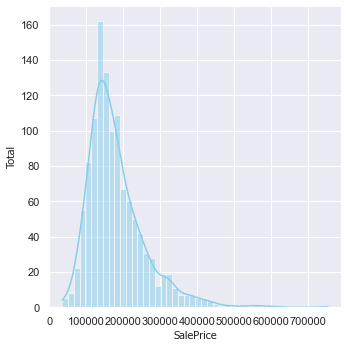

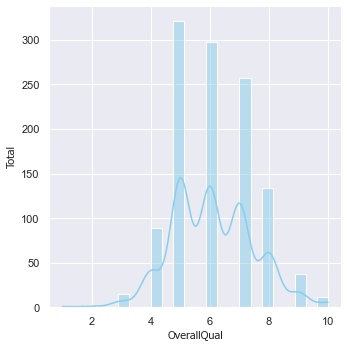

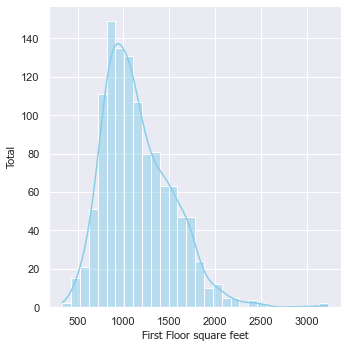

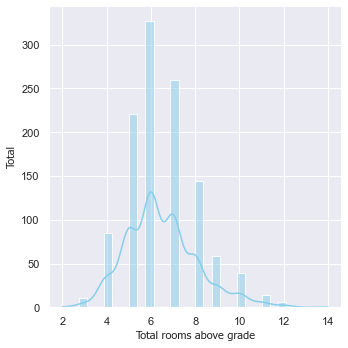

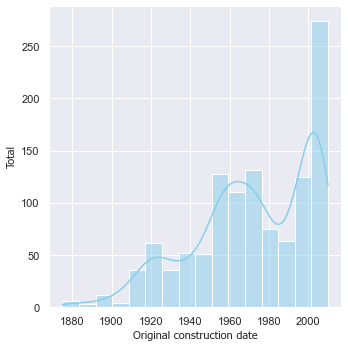

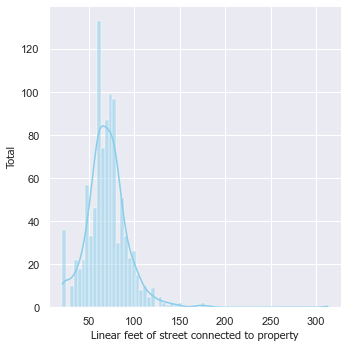

In [195]:
for i in DataSet_Train.columns.values:
    sns.set(style="darkgrid")
    graf = sns.displot(DataSet_Train[i], color="skyblue", kde=True)
    plt.xlabel(i, fontsize = 11, family='Tahoma')
    plt.ylabel('Total', fontsize = 11, family='Tahoma')
    plt.show()

#### 5. Para cada variable independiente x

##### 5.1 Calcular el coeficiente de correlación entre x y y.
##### 5.2 Graficar x vs y(scatterplot) usando matplotlib
##### 5.3 Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica

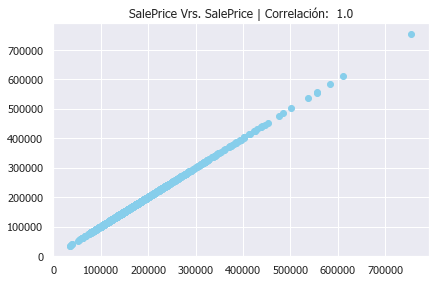

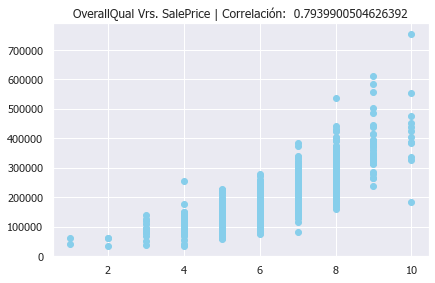

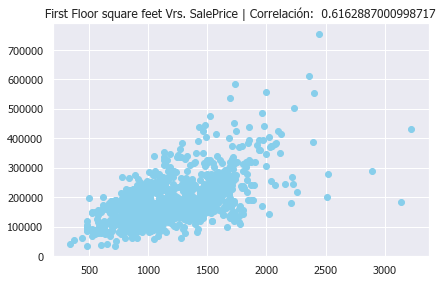

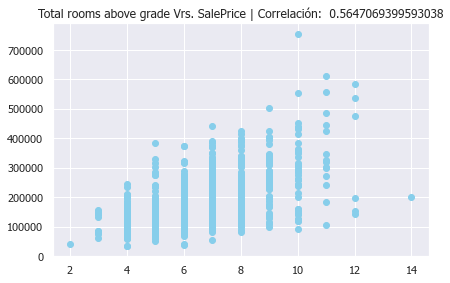

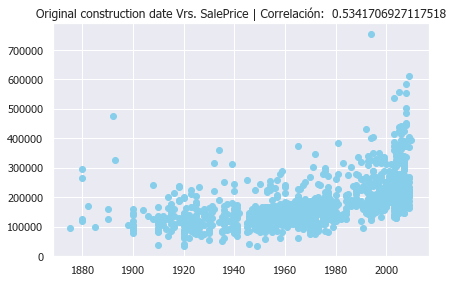

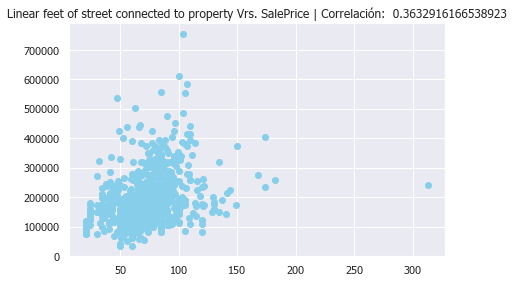

In [196]:
GrafCorrelacion= []
for i in DataSet_Train.columns.values:
    DataCorrelacion = (pd.DataFrame(DataSet_Train[[i,'SalePrice']]).corr().iloc[0,1])
    GrafCorrelacion.append(DataCorrelacion)
    plt.scatter(DataSet_Train[i], DataSet_Train['SalePrice'], color="skyblue")
    plt.xticks(fontsize = 11, family='Tahoma')
    plt.yticks(fontsize = 11, family='Tahoma')
    plt.title(str(i)+' Vrs. ' + str('SalePrice') + ' | Correlación:  '+str((DataCorrelacion)), family='Tahoma')
    plt.show()

##### 5.4 Calcular el coeficiente de correlación entre x y y.

In [197]:
MisCorrelaciones = pd.DataFrame({'Correlaciones':GrafCorrelacion},index=[DataSet_Train.columns.values])
MisCorrelaciones

,Correlaciones
SalePrice,1.000000
OverallQual,0.793990
First Floor square feet,0.616289
Total rooms above grade,0.564707
Original construction date,0.534171
Linear feet of street connected to property,0.363292


##### 5.5 Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

In [198]:
MisCorrelaciones.sort_values(by='Correlaciones', ascending = False)[1:3]

,Correlaciones
OverallQual,0.793990
First Floor square feet,0.616289


#### 6. Crear una función para entrenar un modelo de regresión lineal de una variable

In [185]:
class Regresion_Lineal():
    def __init__(self, x, y, epochs, imprime_error, learning_rate):
 
        self.xz = x
        self.yz = y
        
        self.VY = np.reshape(self.yz, (-1,1))
        self.V1 = np.ones_like(self.xz).reshape(-1,1)
        self.V_1 = np.hstack([np.reshape(self.xz,(-1,1)),self.V1])
        
                   
        self.Err = []
        self.Mod = {}  
                
        self.b_0 = 0
        self.b_1 = 0
        self.bet = np.reshape([[self.b_1],[self.b_0]],(-1,1))
    
        self.epochs = epochs
    
        for i in range(0, epochs):
            self.y_h = np.dot(self.V_1, self.bet)
            self.MsjError = 1/(2*self.VY.shape[0]) * sum((self.VY - self.y_h)**2)
            self.Err.append(self.MsjError[0])
            if i%round(imprime_error) == 0:
                print('Iteración: ', i, '    Error: ',self.MsjError[0])
            self.grad = np.reshape(learning_rate*(1/self.VY.shape[0]*sum((self.y_h - self.VY)*self.V_1)),(-1,1))
            self.bet = self.bet - self.grad
            self.Mod[i] = [self.bet, self.y_h, self.VY, self.xz]
    
    
    # Modelos
    def mimodelo(self):
        return self.Mod , np.array(self.Err)
    
    #Modelo - Errores
    @staticmethod
    def dataerror(error):
        plt.figure(figsize = (7,5))
        plt.plot(error, color="skyblue")
        plt.title("Errores del modelo", family='Tahoma',fontsize = 13)
        plt.xlabel("Epoch", family='Tahoma')
        plt.ylabel("Errores", family='Tahoma')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.show()

     #Modelo - Evolución
    @staticmethod
    def modelevol(Model, n):
        for i in list(Model.keys()):
            if i%round(n) == 0:
                y_h = Model[i][1]
                y = Model[i][2]
                x = Model[i][3]
                plt.figure(figsize = (7,5))
                plt.scatter(x , y, color="skyblue")
                plt.plot(x, y_h, linestyle ='solid', color ='g', label = 'Iteración:  %d' % i)
                plt.title("Modelo: "+str(i), fontsize = 15, family='Tahoma')
                plt.legend(bbox_to_anchor=(1.05,1))
                plt.xlabel("X", fontsize = 13, family='Tahoma')
                plt.xlabel("Y", fontsize = 13, family='Tahoma')
                plt.show()
        
    #Modelo - Predicciónes 
    def mypredict(self, p):
        self.M = p
        self.V1 = np.ones_like(self.M).reshape(-1,1)
        self.V_1 = np.hstack([np.reshape(self.M,(-1,1)),self.V1])
        for i in range(self.epochs):
            self.Y_pred = np.dot(self.V_1, self.bet)
        return self.Y_pred
    
    #Modelo Realiza comparativo
    @staticmethod
    def diferencia_prediccion(M1, M2SKL, Pred, Mo):
        M_1 = M1.mypredict(Pred.reshape(-1,1))
        M_2 = M2SKL.predict(Pred.reshape(-1,1)) 
        r1 = (M_1 + M_2)/2
        graf3 = plt.figure(figsize = (7,5))
        grc = graf3.add_axes([0.02, 0.02, 0.6, 0.6])
        for i in list(Mo.columns.values):
            y1 = Mo[i]
            grc.scatter(Pred , y1, color="skyblue")
            grc.plot(Pred, M_1, color="g", label = 'Regresión : ')
            grc.plot(Pred, M_2, color="r", label = 'MSKLearn: ')
            grc.plot(Pred, r1, color="b", label = 'Prome: ')
            grc.set_title("Comparativa", fontsize = 15, family='Tahoma')            
            grc.set_xlabel("X", fontsize = 13, family='Tahoma')
            grc.set_ylabel('Y', fontsize = 13, family='Tahoma')
            grc.legend(bbox_to_anchor=(1.05,1))
            plt.show()
        return M_1, M_2, r1
           
    #Modelo - Realiza la comparación y verificación de Errores
    @staticmethod
    def verifica_error(m_0, mod_2, test_a, test_b, DataSet_Test1):
        etiqueta = ['OverallQual', 'First Floor Square Feet']
        DataErrA_Reg = metrics.mean_squared_error(m_0[0], test_a)
        DataErrA_MSK = metrics.mean_squared_error(m_0[1], test_a)
        DataErrA_Prom = metrics.mean_squared_error(m_0[2], test_a)
        
        DataErrB_Reg = metrics.mean_squared_error(mod_2[0], test_b)
        DataErrB_MSK = metrics.mean_squared_error(mod_2[1], test_b)
        DataErrB_Prom = metrics.mean_squared_error(mod_2[2], test_b)
        
        DataErrC_Reg = [DataErrA_Reg,DataErrB_Reg]
        DataErrC_MSK = [DataErrA_MSK,DataErrB_MSK]
        DataErrC_Prom = [DataErrA_Prom,DataErrB_Prom]

        Graf_A = np.arange(len(etiqueta))
        Graf4 = plt.figure(figsize = (9,7))
        grc1 = Graf4.add_axes([0.01, 0.01, 0.6, 0.6])
        grc1.set_xticks(Graf_A + 0.90/3)
        grc1.set_xticklabels(etiqueta, fontsize = 13, family='Tahoma')
        grc1.bar(Graf_A, DataErrC_Reg, width=0.35, color="skyblue", label="Regresión")
        grc1.bar(Graf_A+ 0.35, DataErrC_MSK, width=0.35, color="g", label="MSKlearn")
        grc1.bar(Graf_A+ 0.65, DataErrC_Prom, width=0.35, color="b", label="VAL Promedio")
        grc1.legend(bbox_to_anchor=(1.05,1))
        grc1.set_title("Comparación Modelos", fontsize = 15, family='Tahoma')
        plt.show()

#### Modelos de regresión - OverallQual

Iteración:  0     Error:  19409722053.221745
Iteración:  1000     Error:  1184180658.5334759
Iteración:  2000     Error:  1152518915.5881207
Iteración:  3000     Error:  1147758582.9744003
Iteración:  4000     Error:  1147042868.5352964
Iteración:  5000     Error:  1146935261.1053317
Iteración:  6000     Error:  1146919082.3637097


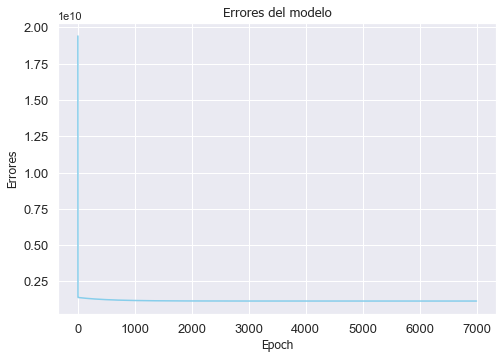

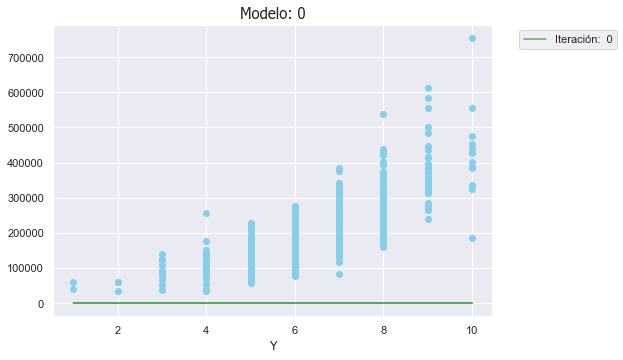

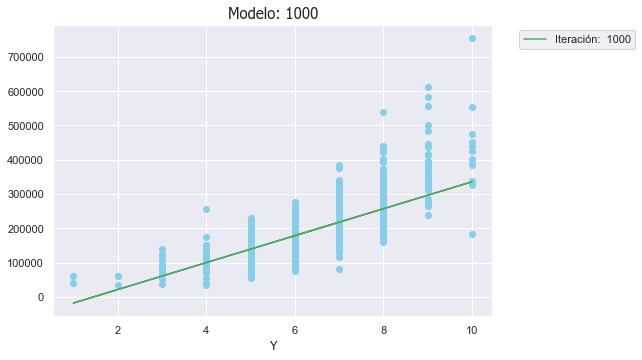

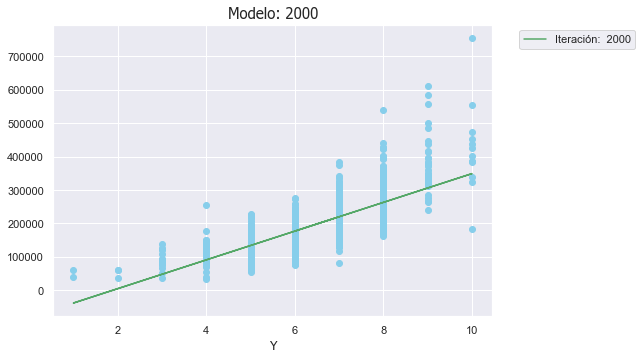

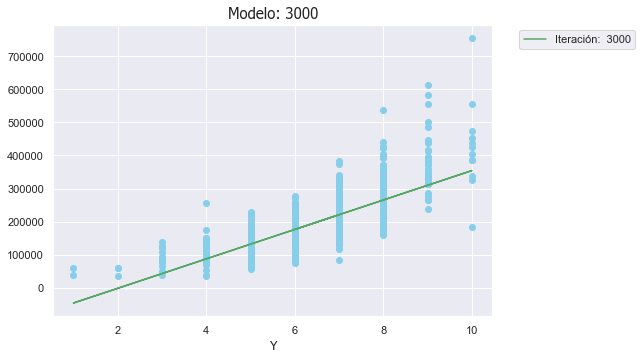

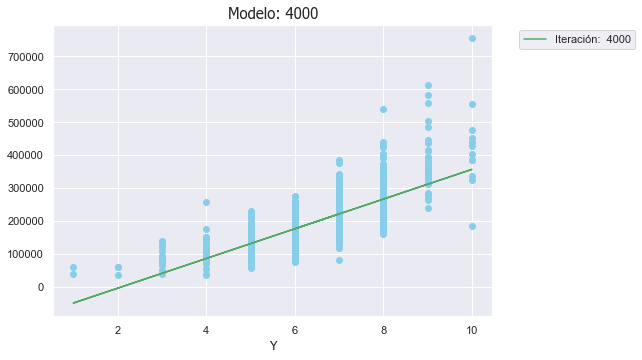

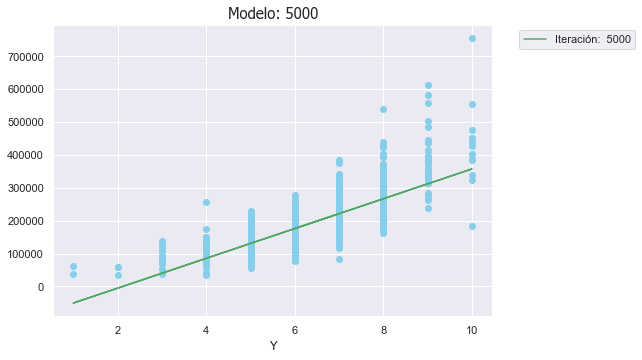

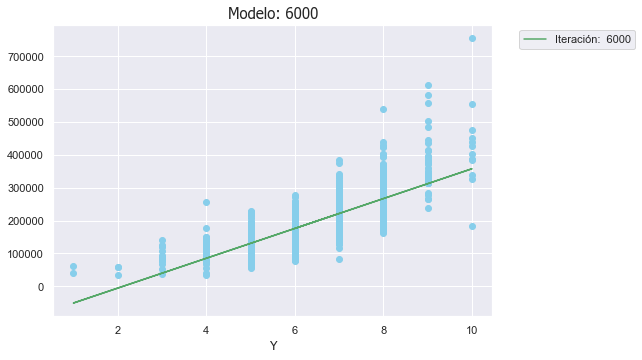

In [178]:
_SalesPrice = np.reshape(np.array(DataSet_Train['SalePrice']), (-1, 1))
_OverallQual = np.reshape(np.array(DataSet_Train['OverallQual']), (-1, 1))
_FFSF = np.reshape(np.array(DataSet_Train['First Floor square feet']), (-1, 1))
_Ep = 7000
_print = 1000
_Esc = 0.02
_R1 = Regresion_Lineal(_OverallQual,_SalesPrice, _Ep, _print, _Esc)
_Mod, _Err = _R1.mimodelo()
Regresion_Lineal.dataerror(_Err)
Regresion_Lineal.modelevol(_Mod,_print)

#### Evolución Modelo First Floor square feet

Iteración:  0     Error:  19409722053.221745
Iteración:  10     Error:  2682203837.751272
Iteración:  20     Error:  1997330831.0274537
Iteración:  30     Error:  1969290140.4881198
Iteración:  40     Error:  1968142065.5973017
Iteración:  50     Error:  1968095052.2081733


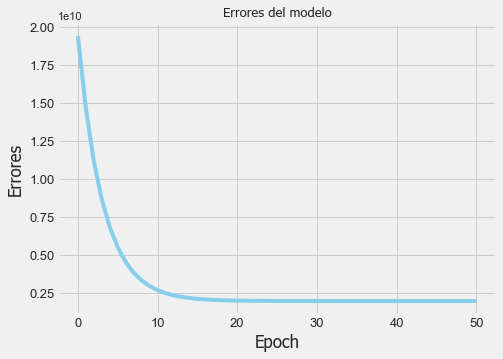

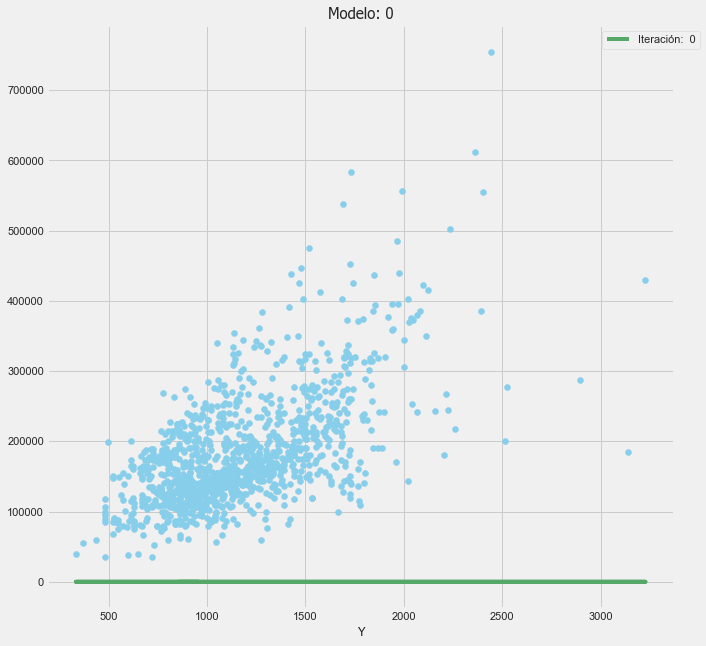

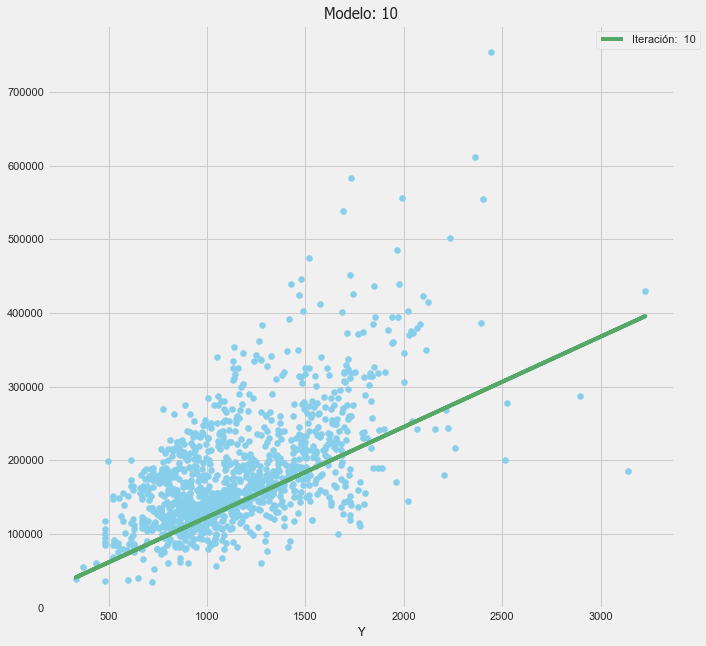

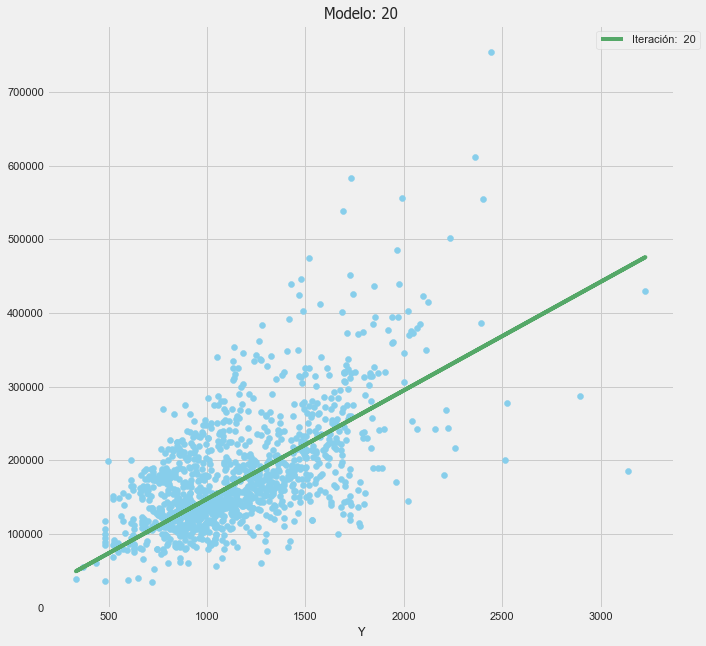

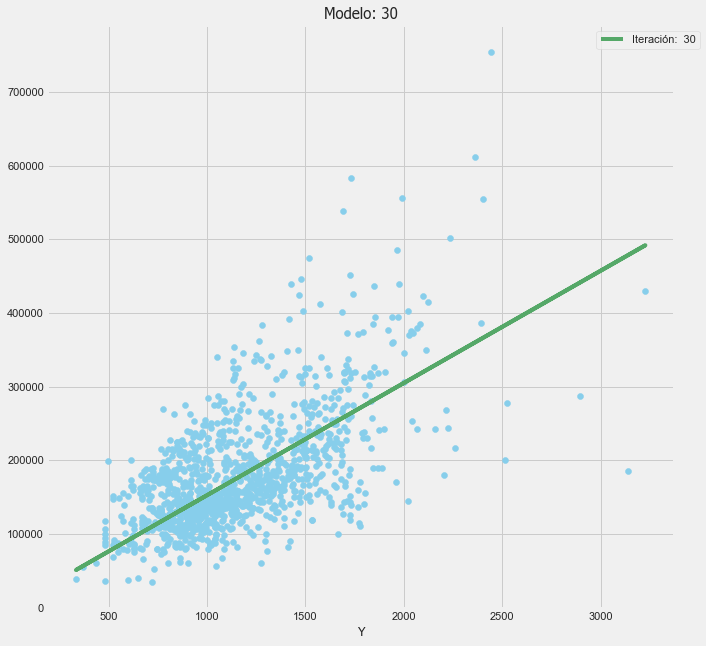

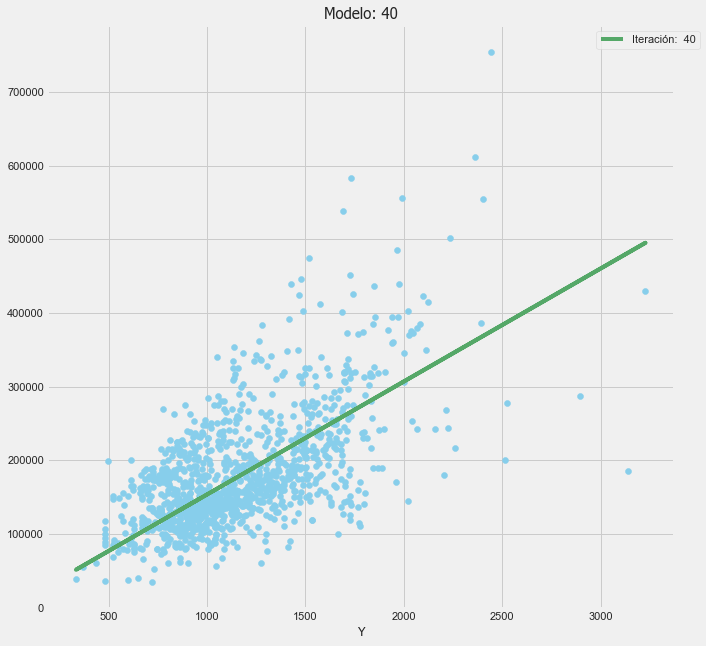

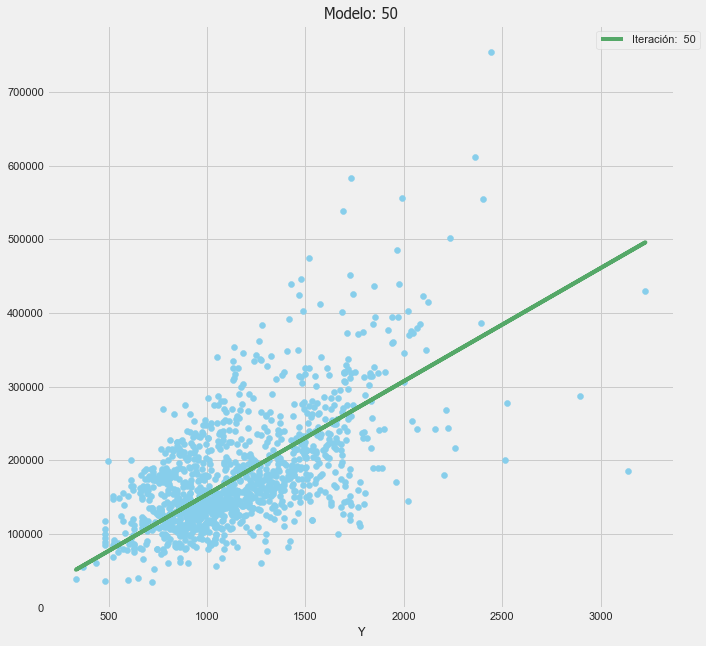

In [211]:
_Ep = 51
_print = 10
_Esc = 0.0000001
_R2 = Regresion_Lineal(_FFSF, _SalesPrice, _Ep, _print, _Esc)
_Mod2, _Err2 = _R2.mimodelo()
Regresion_Lineal.dataerror(_Err2)
Regresion_Lineal.modelevol(_Mod2,_print)

#### Modelo SKLearn

In [180]:
L_OQ = LinearRegression()
L_OQ.fit(_OverallQual, _SalesPrice)
L_FFSF = LinearRegression()
L_FFSF.fit(_FFSF, _SalesPrice)

LinearRegression()

#### Vectorización Set de pruebas

In [182]:
Test_OQ = np.reshape(np.array(DataSet_Test['OverallQual']), (-1, 1))
Test_FFSF = np.reshape(np.array(DataSet_Test['First Floor square feet']), (-1, 1))

#### Comparando Predicciones

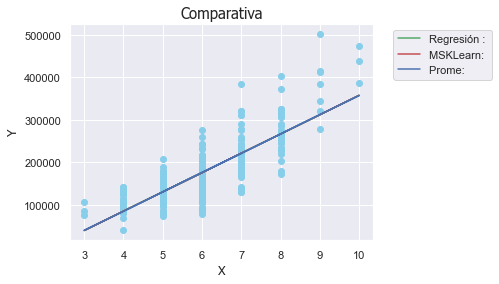

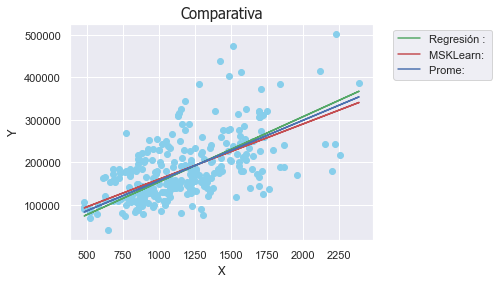

In [183]:
Mod_OQ = Regresion_Lineal.diferencia_prediccion(_R1, L_OQ, Test_OQ, DataSet_Test)
Mod_FFSF = Regresion_Lineal.diferencia_prediccion(_R2, L_FFSF, Test_FFSF, DataSet_Test)

#### Comparando errores de los Modelos

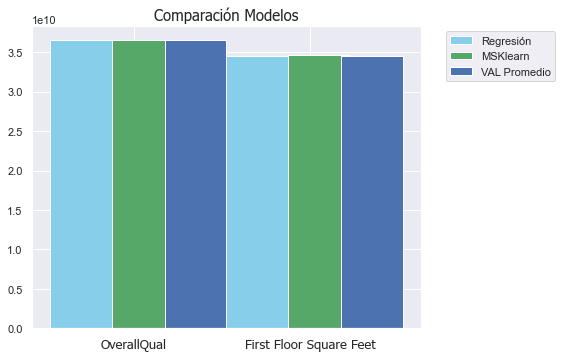

In [184]:
Regresion_Lineal.verifica_error(Mod_OQ,Mod_FFSF,Test_OQ,Test_FFSF, DataSet_Test)

#### PROYECTO FINALIZADO

#### Link Video: https://github.com/EdiAOHernandez/PythonCienciadeDatos/blob/main/ProyectoFinal.mp4